<a href="https://colab.research.google.com/github/ptx-pluto/colab-notebooks/blob/master/filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100

In [53]:
def ground_truth(v_in):
  a1 = 1
  a2 = 1
  w1 = 0.8
  w2 = 3
  return a1*np.sin(w1*v_in) + a2*np.sin(w2*v_in)

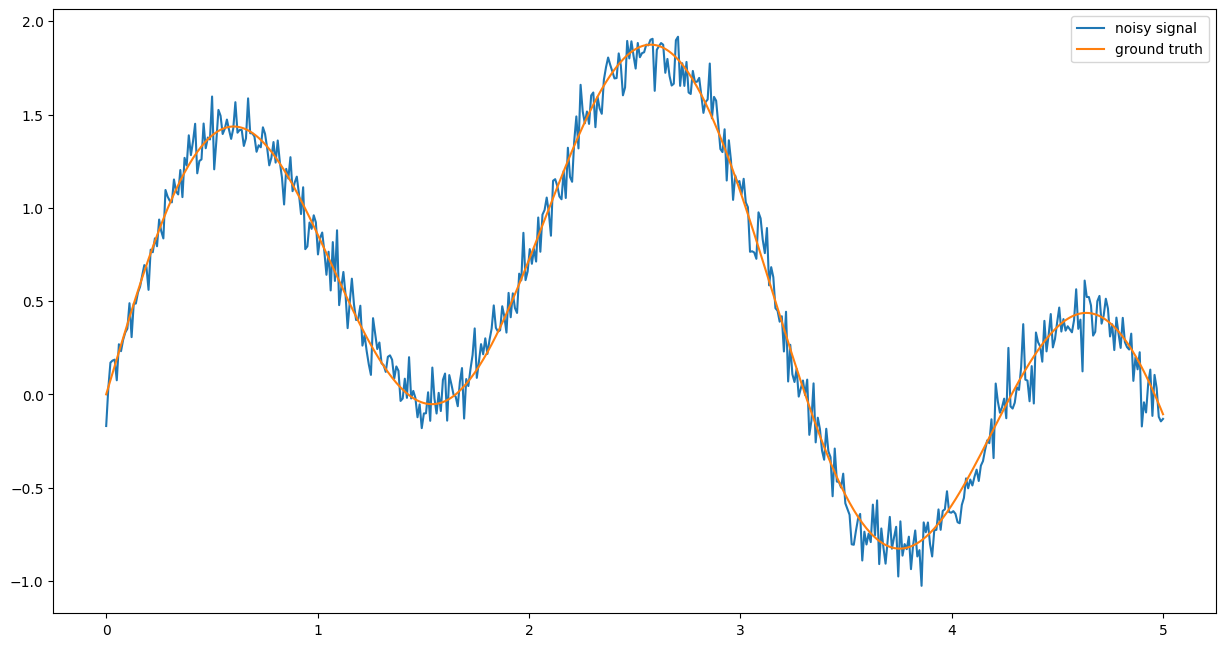

In [59]:
vt = np.linspace(0,5,500)
vy = ground_truth(vt)
vn = np.random.normal(0,0.1,len(vt))
signal = vy+vn
plt.plot(vt,signal,label='noisy signal')
plt.plot(vt,vy,label='ground truth')
plt.legend()

In [60]:
def apply_filter(sig,flt):
  N = len(sig)
  rst = np.zeros(N)
  rst[0] = sig[0]
  for i in range(N-1):
    rst[i+1] = flt(sig[i+1],rst[i])
  return rst

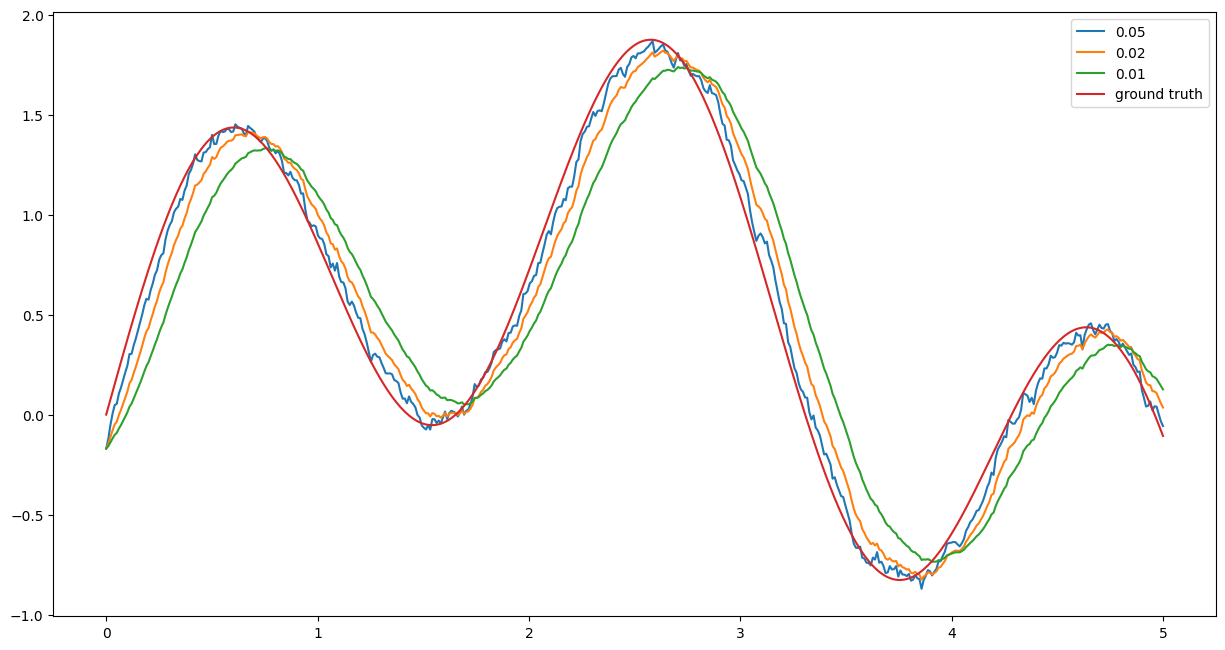

In [61]:
def gen_butterworth(T):
  return lambda cur, pre : pre + (1 / (1 + 1/(2.0 * 3.14 * T )))*(cur - pre)

plt.figure()

for i in [0.05,0.02,0.01]:
  rst = apply_filter(signal,gen_butterworth(i))
  plt.plot(vt,rst,label=str(i))

plt.plot(vt,vy,label='ground truth')
plt.legend()